In [30]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [31]:
matches = pd.read_csv(r"C:\Users\acer pc\IPL Matches 2008-2020.csv",index_col = "id")
deliveries = pd.read_csv(r"C:\Users\acer pc\IPL Ball-by-Ball 2008-2020.csv")

In [32]:
matches.head()

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
id,,,,,,,,,,,,,,,,
335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [33]:
ipl=matches[["team1","team2","toss_winner","toss_decision","venue","winner"]]
ipl.head()


,team1,team2,toss_winner,toss_decision,venue,winner
id,,,,,,
335982,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,M Chinnaswamy Stadium,Kolkata Knight Riders
335983,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings
335984,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Feroz Shah Kotla,Delhi Daredevils
335985,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Wankhede Stadium,Royal Challengers Bangalore
335986,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Eden Gardens,Kolkata Knight Riders


city                13
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64
player_of_match      4
winner               4
result               4
result_margin       17
eliminator           4
method             797
dtype: int64
         team1  team2  team1_toss_win  team1_win  date  result_margin
id                                                                   
335982      12      7             1.0        0.0     0             88
335983       5      0             0.0        0.0     0             32
335984       3     10             0.0        1.0     0              8
335985       8     12             1.0        0.0     0              4
335986       7      1             0.0        1.0     0              4
...        ...    ...             ...        ...   ...            ...
1216547     12      8             0.0        1.0    12            100
1237177      8      2             0.0        

<ipython-input-34-cac3e2e507bc>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")


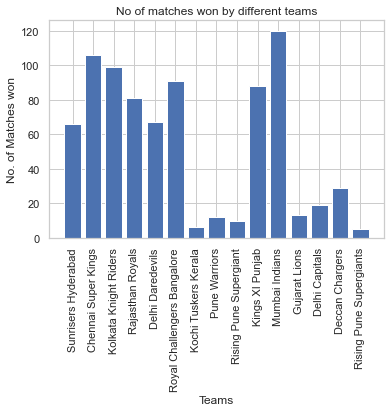

In [34]:
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])

conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])
null_columns=matches.isnull().sum()
print(null_columns[null_columns > 0])


matches=matches[matches["winner"].notna()]
matches

"""# Visualizations"""


toss_win_result = matches.groupby(['toss_winner']).winner.value_counts().reset_index(name="count")
toss_win_result['result']=np.where(toss_win_result.winner==toss_win_result.toss_winner,'won','lost')
toss_win_result_df = toss_win_result.groupby(['toss_winner','result'])['count'].sum().reset_index()



venue_toss_decision_result=matches[["toss_winner","toss_decision","winner","venue"]]
venue_toss_decision_result["decision"]=np.where((venue_toss_decision_result.toss_winner == venue_toss_decision_result.winner) & (venue_toss_decision_result.toss_decision=="field"),"field_won","bat_won")
venue_result=venue_toss_decision_result.groupby(["venue"]).decision.value_counts().reset_index(name="count")

teams = list(set(matches.loc[:,'team1']))
matches_won = [len(matches.loc[matches['winner'] == i]) for i in teams]
plt.bar(np.arange(len(teams)), matches_won)
plt.xticks(np.arange(len(teams)), teams, rotation='vertical')
plt.ylabel('No. of Matches won')
plt.xlabel('Teams')
plt.title('No of matches won by different teams')

"""# Data Preprocessing & Prediction"""


matches["team2"]=matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["team1"]=matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["winner"]=matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["toss_winner"]=matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
matches["date"] = pd.DatetimeIndex(matches['date']).year


encoder= LabelEncoder()
matches["team1"]=encoder.fit_transform(matches["team1"])
matches["team2"]=encoder.fit_transform(matches["team2"])
matches["winner"]=encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["toss_decision"]=encoder.fit_transform(matches["toss_decision"])
matches["toss_winner"]=encoder.fit_transform(matches["toss_winner"])
matches["player_of_match"]=encoder.fit_transform(matches["player_of_match"])
matches["result_margin"]=encoder.fit_transform(matches["result_margin"])
matches["eliminator"]=encoder.fit_transform(matches["eliminator"])


matches["venue"]=encoder.fit_transform(matches["venue"])
matches["city"]=encoder.fit_transform(matches["city"])

matches["date"]=encoder.fit_transform(matches["date"])


matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0

matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0



matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1



prediction_df=matches[["team1","team2","team1_toss_win","team1_win","date","result_margin"]]

print(prediction_df)


correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()
correlation_matrix

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

prediction_df.drop(columns=correlated_features)


X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)




X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.05, random_state=0)
sc = StandardScaler()


X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

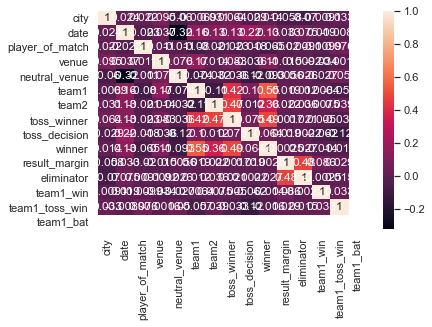

In [35]:
corrmtx=matches.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [37]:
from sklearn.metrics import accuracy_score
y_pred=LR.predict(X_test)
print("Acurracy of our model is :")
accuracy_score(y_test,y_pred)

Acurracy of our model is :


0.6829268292682927

In [38]:
logreg = LogisticRegression()
z = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

[[ 4 11]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        15
           1       0.69      0.92      0.79        26

    accuracy                           0.68        41
   macro avg       0.68      0.59      0.58        41
weighted avg       0.68      0.68      0.64        41

Accuracy of Logistic Regression Classifier on test set: 0.6829


In [39]:
from sklearn.svm import SVC
svm_clf=SVC(gamma="auto")
svm_clf.fit(X_train,y_train)

SVC(gamma='auto')

In [40]:
y_pred=svm_clf.predict(X_test)
print("Acurracy of our model is :")
accuracy_score(y_test,y_pred)

Acurracy of our model is :


0.6097560975609756

In [46]:
svm=SVC()
l = svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

[[ 4 11]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.44      0.27      0.33        15
           1       0.66      0.81      0.72        26

    accuracy                           0.61        41
   macro avg       0.55      0.54      0.53        41
weighted avg       0.58      0.61      0.58        41

Accuracy of SVM classifier on test set: 0.6098


In [41]:
randomForest= RandomForestClassifier(n_estimators=100)
k = randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

Confusion matrix
 [[ 7  8]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.71      0.77      0.74        26

    accuracy                           0.66        41
   macro avg       0.63      0.62      0.62        41
weighted avg       0.65      0.66      0.65        41

Accuracy of random forest classifier on test set: 0.6585


In [42]:
k.score(X_train, y_train)
y_train
model_output = k.predict(X_train)
model_output
model_output == y_train
np.sum(model_output == y_train)
model_output.shape[0]
np.sum((model_output == y_train))/model_output.shape[0]

k.score(X_test, y_test)

0.6585365853658537

In [43]:
def Annotation(plots):
    for bar in plots.patches:

        plots.annotate(format(bar.get_height(), '.2f'), 
                       (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                       size=8, xytext=(0, 5),
                       textcoords='offset points')

Text(0.5, 1.0, 'Toss winner and Match Winner')

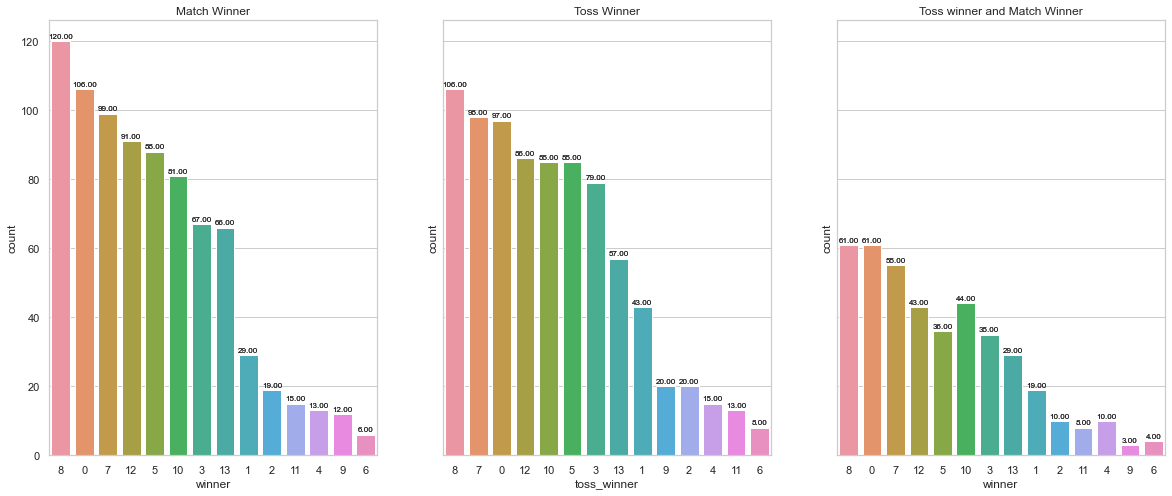

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(20,8), sharey=True)
sns.set_theme(style="whitegrid")

sns.countplot(ax=ax[0],x="winner", data=matches,order = matches["winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[0],x="winner", data=matches,order = matches["winner"].value_counts().index))
ax[0].set_title("Match Winner")


sns.countplot(ax=ax[1],x="toss_winner", data=matches,order = matches["toss_winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[1],x="toss_winner", data=matches,order = matches["toss_winner"].value_counts().index))
ax[1].set_title("Toss Winner")

sns.countplot(ax=ax[2],x="winner", data=matches[matches['toss_winner']==matches['winner']],order = matches["winner"].value_counts().index)
Annotation(sns.countplot(ax=ax[2],x="winner", data=matches[matches['toss_winner']==matches['winner']],order = matches["winner"].value_counts().index))
ax[2].set_title("Toss winner and Match Winner")

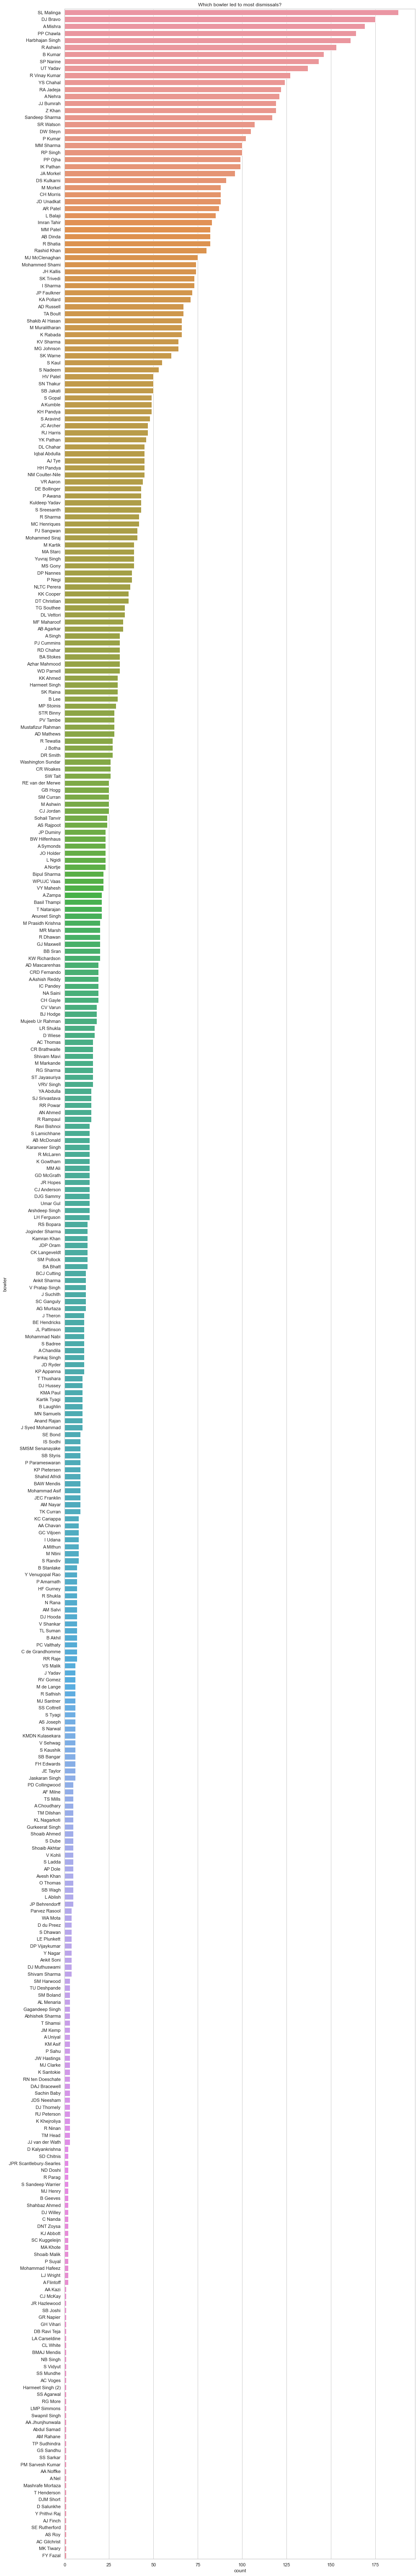

In [45]:
deliveries['dismissal_kind'].fillna('Not a wicket', inplace=True)
plt.figure(figsize=(15,112))
sns.countplot(y=deliveries[deliveries['dismissal_kind'] != 'Not a wicket']['bowler'],
              order=deliveries[deliveries['dismissal_kind'] != 'Not a wicket']['bowler'].value_counts().index)
plt.title('Which bowler led to most dismissals?')
plt.show()